In [1]:
import pyodbc
import pandas as pd
from sqlalchemy import create_engine
import os

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
conn = pyodbc.connect(
    'DRIVER={ODBC Driver 18 for SQL Server};'
    'SERVER=MANISHA;'
    'DATABASE=book_store;'
    'Trusted_Connection=yes;' ##  windows authentication
    'Encrypt=no;' ## bypass the encryption
    )


In [4]:
server ='MANISHA'
database ='book_store'

##create engine for SSMS windows authentication

conn_str = f"mssql+pyodbc://@{server}/{database}?trusted_connection=yes&driver=ODBC+Driver+18+for+SQL+Server&Encrypt=no"
engine = create_engine(conn_str)

In [5]:
os.listdir()

['.ipynb_checkpoints',
 '1.basic python.ipynb',
 '10.Matplotlib & Seaborn.ipynb',
 '11. Data Analysis Examples.ipynb',
 '2.Object Oriented Programming -Python.ipynb',
 '3. Collections,Regex,Web-scraping.ipynb',
 '4.Web-Scraping-Exercises.ipynb',
 '5.Images and Advanced Data Structures.ipynb',
 '6.Practice Python.ipynb',
 '7.NumPY & Pandas-Intro.ipynb',
 '8.Data Cleaning, Wrangling, Aggregation.ipynb',
 '9. Time Series.ipynb',
 'book_store',
 'book_store_analysis.ipynb',
 'database.json',
 'DMART.NS.csv',
 'EDA',
 'file.csv',
 'job.db',
 'jobs_module.py',
 'movies.dat',
 'myfile.txt',
 'my_img1.jpg',
 'names',
 'output.csv',
 'patches.png',
 'poem.txt',
 'py_dir',
 'rand_file.npy',
 'ratings.dat',
 'stocks.csv',
 'sys.stdout',
 'tips.csv',
 'users.dat',
 'zomato.csv',
 '__pycache__']

In [6]:
table_list =[]
folder = 'book_store'
for filename in os.listdir(folder):
    if filename.endswith('.csv'):
        
        filepath = os.path.join(folder, filename)
        table_name =filename.split('.')[0]
        table_list.append(table_name)
        df= pd.read_csv(filepath)
    
        df.to_sql(table_name,engine,if_exists='replace', index =False)
        print(f"Completed loading {table_name} to {database}" )
    else:
        print (f"Failed loading {table_name} to {database}")
    

Completed loading books to book_store
Completed loading customers to book_store
Completed loading orders to book_store


In [8]:
book = pd.read_sql("select * from books", engine)

In [9]:
book.head()

,Book_ID,Title,Author,Genre,Published_Year,Price,Stock
0,1,Configurable modular throughput,Joseph Crane,Biography,1949,21.34,100
1,2,Persevering reciprocal knowledge user,Mario Moore,Fantasy,1971,35.80,19
2,3,Streamlined coherent initiative,Derrick Howard,Non-Fiction,1913,15.75,27
3,4,Customizable 24hour product,Christopher Andrews,Fiction,2020,43.52,8
4,5,Adaptive 5thgeneration encoding,Juan Miller,Fantasy,1956,10.95,16


# Initial EDA

In [24]:
table_list

['books', 'customers', 'orders']

In [25]:
for table in table_list:
    query =f"select * from {table}"
    df = pd.read_sql(query,engine)
    if(df.isnull().sum().any()):
        print(f"{table} has null values")
    else:
        print(f"{table} does NOT have null values")

books does NOT have null values
customers does NOT have null values
orders does NOT have null values


### 1. Find missing values, get basic understading of tables info, shape, columns 

In [10]:

for table in table_list:
    query =f"select * from {table}"
    df = pd.read_sql(query,engine)
    print(f"TABLE NAME: {table}")
    print(f"SHAPE : {df.shape}\n")
    print(f"{df.info()}\n")
    print(df.head(1))
    print("\n")


TABLE NAME: books
SHAPE : (500, 7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Book_ID         500 non-null    int64  
 1   Title           500 non-null    object 
 2   Author          500 non-null    object 
 3   Genre           500 non-null    object 
 4   Published_Year  500 non-null    int64  
 5   Price           500 non-null    float64
 6   Stock           500 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 27.5+ KB
None

   Book_ID                            Title        Author      Genre  \
0        1  Configurable modular throughput  Joseph Crane  Biography   

   Published_Year  Price  Stock  
0            1949  21.34    100  


TABLE NAME: customers
SHAPE : (500, 6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column       Non-Null 

In [13]:
book.describe()

,Book_ID,Published_Year,Price,Stock
count,500.000000,500.000000,500.000000,500.000000
mean,250.500000,1959.918000,27.367440,50.112000
std,144.481833,36.271511,13.243433,29.920192
min,1.000000,1900.000000,5.070000,0.000000
25%,125.750000,1927.000000,15.390000,25.000000
50%,250.500000,1961.000000,27.300000,49.000000
75%,375.250000,1990.000000,38.510000,77.000000
max,500.000000,2023.000000,49.980000,100.000000


In [14]:
book[book['Stock']==0]

,Book_ID,Title,Author,Genre,Published_Year,Price,Stock
43,44,Networked systemic implementation,Ryan Frank,Science Fiction,1965,13.55,0
59,60,Robust eco-centric capacity,Brian Haney,Biography,1990,35.14,0
126,127,Business-focused real-time benchmark,David Nelson,Science Fiction,1997,11.66,0
162,163,Object-based eco-centric challenge,Douglas Mccarthy,Non-Fiction,1905,19.11,0
377,378,Future-proofed heuristic function,Samantha Mcclain,Romance,1903,6.01,0


In [15]:
book.describe(include = 'object')

,Title,Author,Genre
count,500,500,500
unique,500,493,7
top,Configurable modular throughput,Michael Johnson,Science Fiction
freq,1,2,84


In [16]:
cus = pd.read_sql("select * from customers", engine)
cus.head()

,Customer_ID,Name,Email,Phone,City,Country
0,1,Deborah Griffith,balljoseph@wright-keith.net,1234567891,South Craigfort,Denmark
1,2,Crystal Clements,kimberlybennett@curtis.com,1234567892,East Derekberg,Nicaragua
2,3,Susan Fuller,beanmichael@burnett-stewart.net,1234567893,Austinbury,Equatorial Guinea
3,4,Jamie Ramirez,amandahood@warren.com,1234567894,Dianamouth,Slovenia
4,5,Marcus Murphy,connerjohn@yahoo.com,1234567895,Smithbury,Guinea-Bissau


In [18]:
cus.describe(include='object')

,Name,Email,City,Country
count,500,500,500,500
unique,496,500,489,215
top,Christopher Lewis,balljoseph@wright-keith.net,Emilymouth,Cuba
freq,2,1,3,7


### 2. Find duplicated values

In [37]:
##duplicated names available 
cus[cus['Name'].duplicated(keep=False)]

,Customer_ID,Name,Email,Phone,City,Country
10,11,Thomas Garcia,rmiller@gmail.com,1234567901,West Monicabury,Argentina
240,241,Christopher Lewis,john63@brandt.net,1234568131,Lake Shawn,Swaziland
255,256,Denise Hall,stephenthompson@yoder-pearson.com,1234568146,East Wyattchester,Mauritius
331,332,Christopher Lewis,smithlauren@hart.com,1234568222,Tracyborough,Gibraltar
366,367,Denise Hall,cohenvictoria@yahoo.com,1234568257,Jimmyhaven,Germany
383,384,Thomas Garcia,davidvelez@romero-marsh.com,1234568274,Michaelview,Sri Lanka
475,476,Stephanie Martinez,robertomoore@lee-kemp.net,1234568366,Aprilshire,Zimbabwe
478,479,Stephanie Martinez,lbrown@potts.com,1234568369,Jessicamouth,Singapore


In [40]:
## There is a mismatch in Email, phone city and country but the duplicates will be elimitaed  
cus[cus.duplicated()]

,Customer_ID,Name,Email,Phone,City,Country


In [49]:
cus = cus[~cus['Name'].duplicated()]## dropping the second instance of the name which is occuring

In [52]:
orders = pd.read_sql("select * from orders", engine)
orders.head()

,Order_ID,Customer_ID,Book_ID,Order_Date,Quantity,Total_Amount
0,1,84,169,5/26/2023,8,188.56
1,2,137,301,1/23/2023,10,216.60
2,3,216,261,5/27/2024,6,85.50
3,4,433,343,11/25/2023,7,301.21
4,5,14,431,7/26/2023,7,136.36


In [55]:
orders.describe()

,Order_ID,Customer_ID,Book_ID,Quantity,Total_Amount
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,254.118000,250.452000,5.394000,151.257320
std,144.481833,144.743211,144.401452,2.937349,118.775038
min,1.000000,2.000000,1.000000,1.000000,5.370000
25%,125.750000,131.000000,120.750000,3.000000,49.122500
50%,250.500000,259.000000,245.000000,5.000000,124.390000
75%,375.250000,383.250000,380.250000,8.000000,221.710000
max,500.000000,500.000000,497.000000,10.000000,491.500000


### 3. Merge the tables into a final table for analysis
Common columns would be the following :<br>
Books  book_id on Orders book_id--> table1 <br>
table1 customer_id on customers customer_id--> final_df

In [91]:
table1 = pd.merge(book, orders , on ='Book_ID', how='inner')
table1.head()
## There might be books which didnt have any order which is why we hae 683 rows

,Book_ID,Title,Author,Genre,Published_Year,Price,Stock,Order_ID,Customer_ID,Order_Date,Quantity,Total_Amount
0,1,Configurable modular throughput,Joseph Crane,Biography,1949,21.34,100,131,16,5/27/2024,3,64.02
1,3,Streamlined coherent initiative,Derrick Howard,Non-Fiction,1913,15.75,27,12,454,6/17/2024,2,31.50
2,3,Streamlined coherent initiative,Derrick Howard,Non-Fiction,1913,15.75,27,328,232,1/19/2024,3,47.25
3,5,Adaptive 5thgeneration encoding,Juan Miller,Fantasy,1956,10.95,16,72,290,10/19/2024,1,10.95
4,5,Adaptive 5thgeneration encoding,Juan Miller,Fantasy,1956,10.95,16,444,155,12/12/2022,7,76.65


In [92]:
final_df = pd.merge(table1, cus, on='Customer_ID', how='inner')
final_df.head()

,Book_ID,Title,Author,Genre,Published_Year,Price,Stock,Order_ID,Customer_ID,Order_Date,Quantity,Total_Amount,Name,Email,Phone,City,Country
0,1,Configurable modular throughput,Joseph Crane,Biography,1949,21.34,100,131,16,5/27/2024,3,64.02,Stacey Flores,jackjackson@hotmail.com,1234567906,East Michaelfurt,Saint Helena
1,149,Expanded explicit solution,Tonya Robertson,Biography,1957,17.09,73,326,16,6/15/2024,6,102.54,Stacey Flores,jackjackson@hotmail.com,1234567906,East Michaelfurt,Saint Helena
2,469,Automated 5thgeneration customer loyalty,Kimberly Shannon,Fantasy,1967,23.25,92,63,16,4/13/2024,9,209.25,Stacey Flores,jackjackson@hotmail.com,1234567906,East Michaelfurt,Saint Helena
3,3,Streamlined coherent initiative,Derrick Howard,Non-Fiction,1913,15.75,27,12,454,6/17/2024,2,31.50,April Anderson,calexander@yahoo.com,1234568344,Micheleborough,Guyana
4,319,Distributed disintermediate groupware,Michael Mckenzie,Fantasy,1964,42.61,50,14,454,8/24/2023,2,85.22,April Anderson,calexander@yahoo.com,1234568344,Micheleborough,Guyana


In [94]:
final_df.shape

(498, 17)

### 4. Distribution of price and total Amount

<Axes: xlabel='Price', ylabel='Count'>

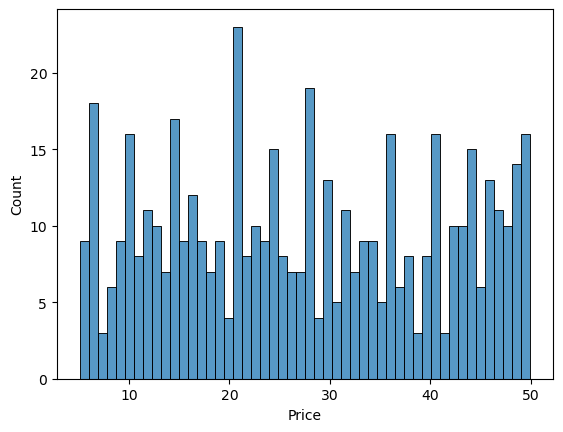

In [97]:
## Price for a single book is a uniform distribution without skewness, meaning it is mostly even
## No possible price domination for a specific price band and potential for outliers is low
sns.histplot(final_df['Price'], bins=50)

<Axes: xlabel='Total_Amount', ylabel='Count'>

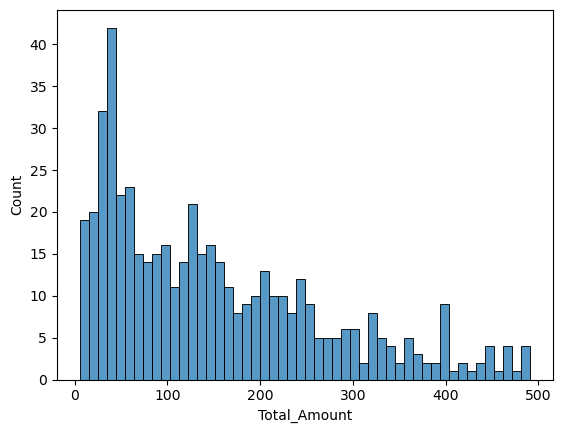

In [98]:
sns.histplot(final_df['Total_Amount'],bins=50)
## Right skewed, possibility of outliers
## More on the 40s price band

### 5. Capping the outliers

<Axes: >

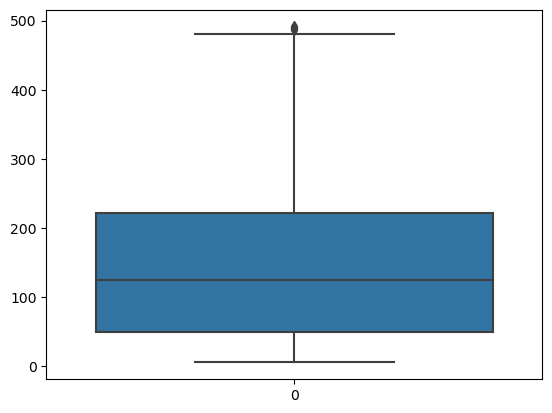

In [103]:
sns.boxplot(final_df['Total_Amount'])

In [116]:
### There are outliers at the higher end for total_amount, this is possible when a customer buys more quantity of books
upper_bound = final_df['Total_Amount'].quantile(0.99) 
#only top 1% of the values is greater than 470

upper_bound

470.0179999999997

In [117]:
final_df[final_df['Total_Amount']> upper_bound]

,Book_ID,Title,Author,Genre,Published_Year,Price,Stock,Order_ID,Customer_ID,Order_Date,Quantity,Total_Amount,Name,Email,Phone,City,Country
105,142,Multi-tiered responsive parallelism,Amanda Wilson,Fiction,1940,48.96,11,91,226,10/13/2024,10,489.6,Kevin Collins,smithclinton@goodman-jackson.com,1234568116,Thomaschester,San Marino
212,120,Integrated secondary access,Sheena Harris,Non-Fiction,1984,48.03,93,492,284,4/28/2024,10,480.3,Annette Garcia,donald50@yahoo.com,1234568174,Melissaside,San Marino
247,142,Multi-tiered responsive parallelism,Amanda Wilson,Fiction,1940,48.96,11,247,77,3/7/2024,10,489.6,Jason Villegas,thomas00@stewart.com,1234567967,Fieldsland,Senegal
309,209,Distributed modular capability,Nicole Berger,Mystery,1979,48.67,63,211,397,1/17/2024,10,486.7,Catherine Wilkins,nathanielrogers@yahoo.com,1234568287,Mendezburgh,Australia
494,488,Optimized attitude-oriented synergy,Cory Ross,Non-Fiction,1985,49.15,64,368,17,5/17/2023,10,491.5,Christine Maldonado,ztaylor@yahoo.com,1234567907,Smithborough,Chile


In [119]:
final_df = final_df[final_df['Total_Amount']< upper_bound]

### 6. Is there any seasonal trend between order_date and Total_Amount spent?

In [133]:
final_df['Order_Date'] = pd.to_datetime(final_df['Order_Date'])

In [134]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 493 entries, 0 to 497
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Book_ID         493 non-null    int64         
 1   Title           493 non-null    object        
 2   Author          493 non-null    object        
 3   Genre           493 non-null    object        
 4   Published_Year  493 non-null    int64         
 5   Price           493 non-null    float64       
 6   Stock           493 non-null    int64         
 7   Order_ID        493 non-null    int64         
 8   Customer_ID     493 non-null    int64         
 9   Order_Date      493 non-null    datetime64[ns]
 10  Quantity        493 non-null    int64         
 11  Total_Amount    493 non-null    float64       
 12  Name            493 non-null    object        
 13  Email           493 non-null    object        
 14  Phone           493 non-null    int64         
 15  City       

In [192]:
trend = final_df[['Order_Date','Total_Amount','Quantity','Stock']]
trend

,Order_Date,Total_Amount,Quantity,Stock
0,2024-05-27,64.02,3,100
1,2024-06-15,102.54,6,73
2,2024-04-13,209.25,9,92
3,2024-06-17,31.50,2,27
4,2023-08-24,85.22,2,50
...,...,...,...,...
492,2023-12-09,162.12,7,57
493,2023-02-19,231.60,10,57
495,2024-03-21,148.70,10,2
496,2024-09-18,44.61,3,2


In [193]:
trend = trend.set_index('Order_Date')
trend

,Total_Amount,Quantity,Stock
Order_Date,,,
2024-05-27,64.02,3,100
2024-06-15,102.54,6,73
2024-04-13,209.25,9,92
2024-06-17,31.50,2,27
2023-08-24,85.22,2,50
...,...,...,...
2023-12-09,162.12,7,57
2023-02-19,231.60,10,57
2024-03-21,148.70,10,2


<Axes: xlabel='Order_Date'>

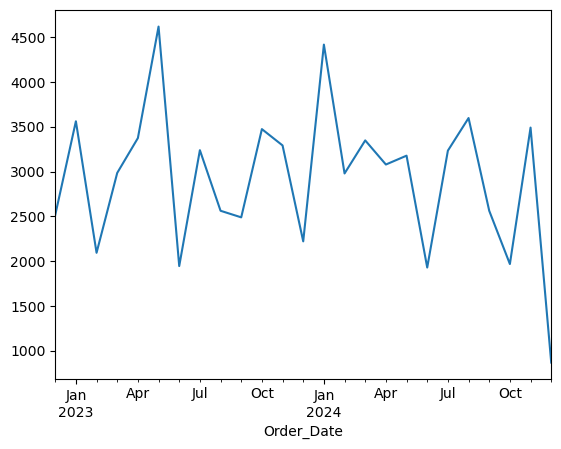

In [194]:
## monthly sales over time
trend.resample('M')['Total_Amount'].sum().plot()

<Axes: xlabel='Order_Date'>

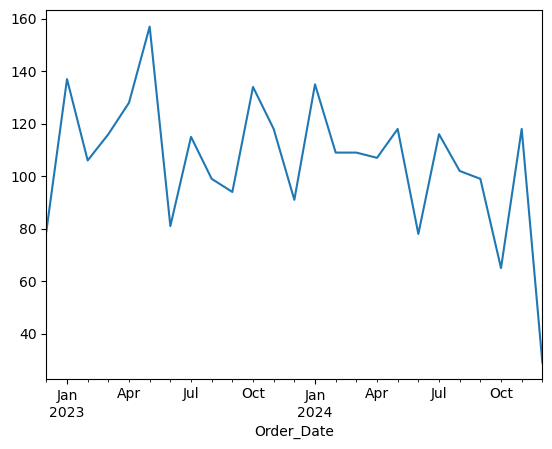

In [195]:
trend.resample('M')['Quantity'].sum().plot()

In [196]:
trend = trend.reset_index()
trend

,Order_Date,Total_Amount,Quantity,Stock
0,2024-05-27,64.02,3,100
1,2024-06-15,102.54,6,73
2,2024-04-13,209.25,9,92
3,2024-06-17,31.50,2,27
4,2023-08-24,85.22,2,50
...,...,...,...,...
488,2023-12-09,162.12,7,57
489,2023-02-19,231.60,10,57
490,2024-03-21,148.70,10,2
491,2024-09-18,44.61,3,2


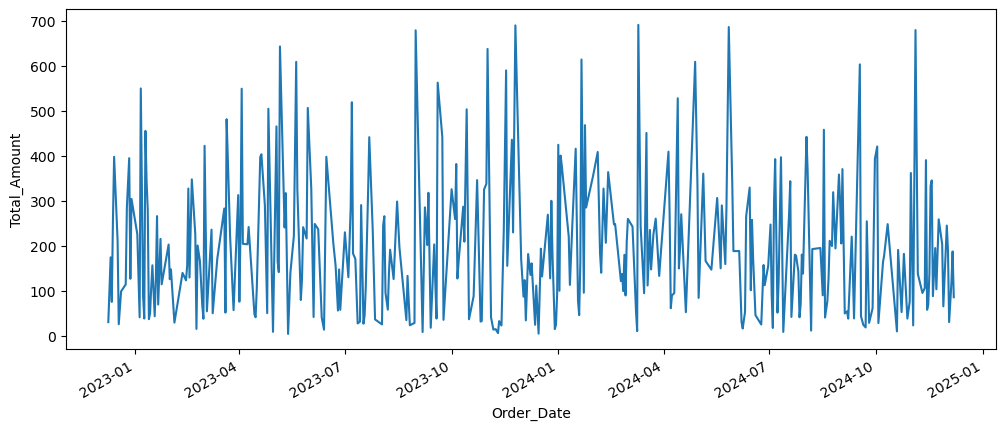

In [197]:
trend.groupby('Order_Date')['Total_Amount'].sum().plot(figsize=(12,5))
plt.ylabel('Total_Amount')
plt.show()


There are frequent sharp spikes, indicating some transactions are significantly higher in value than others — likely due to large orders or high-priced books.

The sharp up-and-down movement suggests high variability, not smooth seasonal patterns.
No clear seasonal trend:

You don't see obvious monthly or quarterly peaks (e.g., no clear jump every December or summer).

In [198]:
##get the end date of order_date
trend['Order_Date'].sort_values().tail(1)

355   2024-12-07
Name: Order_Date, dtype: datetime64[ns]

<Axes: xlabel='Order_Date'>

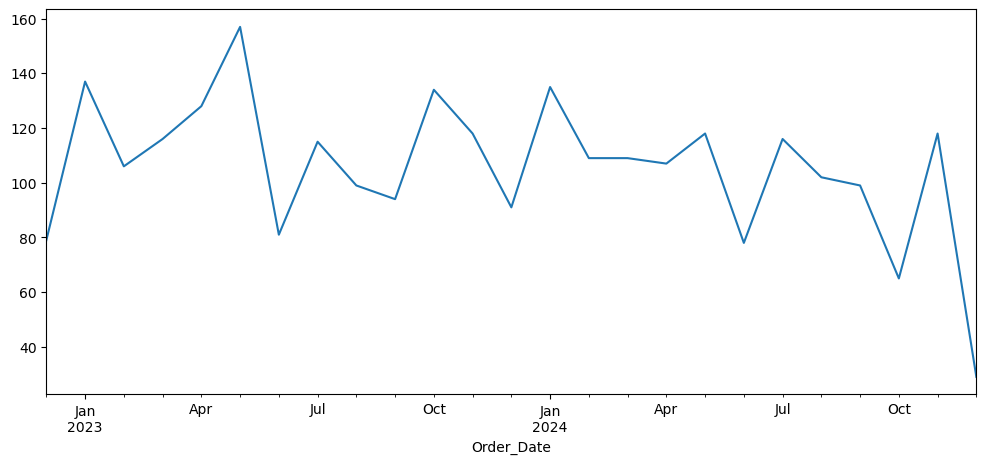

In [199]:
trend.groupby(trend['Order_Date'].dt.to_period('M'))['Quantity'].sum().plot(figsize=(12,5))

<Axes: xlabel='Order_Date'>

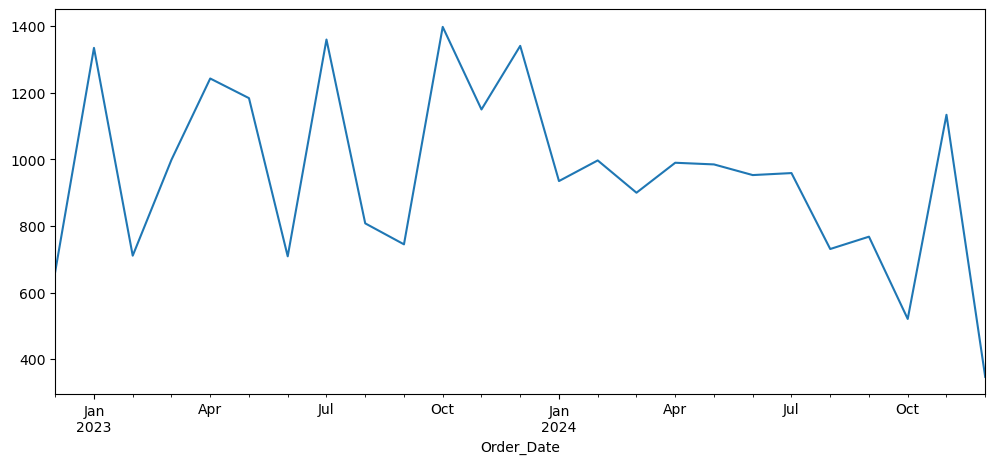

In [200]:
trend.groupby(trend['Order_Date'].dt.to_period('M'))['Stock'].sum().plot(figsize=(12,5))

any other seasonal trend is not observed in stock , quantity purchased with respect to order date

### 7. Which genres were most frequently published in most frequently appearing published years.
Consider top 20 published year which appear the most/ has the most count in the entire dataset

In [248]:
top20_years = final_df['Published_Year'].value_counts().nlargest(20).index
top20_years

Index([1984, 2006, 1966, 1959, 1911, 1976, 1965, 2021, 1903, 1961, 1919, 2009,
       1990, 1929, 1957, 2010, 1977, 1964, 1913, 2005],
      dtype='int64', name='Published_Year')

In [249]:
filter_date = final_df[final_df['Published_Year'].isin(top20_years)]
filter_date

,Book_ID,Title,Author,Genre,Published_Year,Price,Stock,Order_ID,Customer_ID,Order_Date,Quantity,Total_Amount,Name,Email,Phone,City,Country
1,149,Expanded explicit solution,Tonya Robertson,Biography,1957,17.09,73,326,16,2024-06-15,6,102.54,Stacey Flores,jackjackson@hotmail.com,1234567906,East Michaelfurt,Saint Helena
3,3,Streamlined coherent initiative,Derrick Howard,Non-Fiction,1913,15.75,27,12,454,2024-06-17,2,31.50,April Anderson,calexander@yahoo.com,1234568344,Micheleborough,Guyana
4,319,Distributed disintermediate groupware,Michael Mckenzie,Fantasy,1964,42.61,50,14,454,2023-08-24,2,85.22,April Anderson,calexander@yahoo.com,1234568344,Micheleborough,Guyana
5,3,Streamlined coherent initiative,Derrick Howard,Non-Fiction,1913,15.75,27,328,232,2024-01-19,3,47.25,Kelli Bishop,xmiller@gmail.com,1234568122,Port Jasonview,Jersey
8,13,Adaptive 5thgeneration orchestration,Jaclyn Miller,Romance,1913,14.04,99,264,290,2023-10-29,9,126.36,Sarah Cameron,egonzalez@bell.com,1234568180,West Blake,Guyana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,463,Re-engineered disintermediate definition,Cheryl Anderson,Fantasy,1911,11.99,36,464,392,2022-12-20,1,11.99,Dustin Ramirez,steven64@hotmail.com,1234568282,Ryanhaven,Spain
488,471,Cross-platform next generation website,Anna Roberts,Romance,1929,45.38,37,489,211,2023-02-22,5,226.90,Ronald Jordan,nhernandez@farmer.org,1234568101,Leonardport,Fiji
490,479,Balanced grid-enabled architecture,Christian Morales,Fiction,2009,38.27,60,15,127,2023-01-10,6,229.62,Joseph Mcmahon,sharon15@stone.com,1234568017,Lake Mary,Reunion
491,479,Balanced grid-enabled architecture,Christian Morales,Fiction,2009,38.27,60,176,86,2023-09-19,6,229.62,Molly Robinson,rebeccataylor@mcbride.info,1234567976,South Kathleen,Cuba


In [252]:
pivot = filter_date.pivot_table(index='Published_Year', columns='Genre', values='Quantity', aggfunc='sum', fill_value=0)
pivot

Genre,Biography,Fantasy,Fiction,Mystery,Non-Fiction,Romance,Science Fiction
Published_Year,,,,,,,
1903,0,15,6,5,17,6,0
1911,1,5,2,1,0,23,0
1913,2,0,0,19,5,9,8
1919,0,19,0,27,0,0,3
1929,0,0,0,6,0,45,0
1957,14,14,17,0,0,5,0
1959,0,25,0,10,10,17,0
1961,0,19,7,15,0,0,0
1964,0,12,0,10,0,0,35


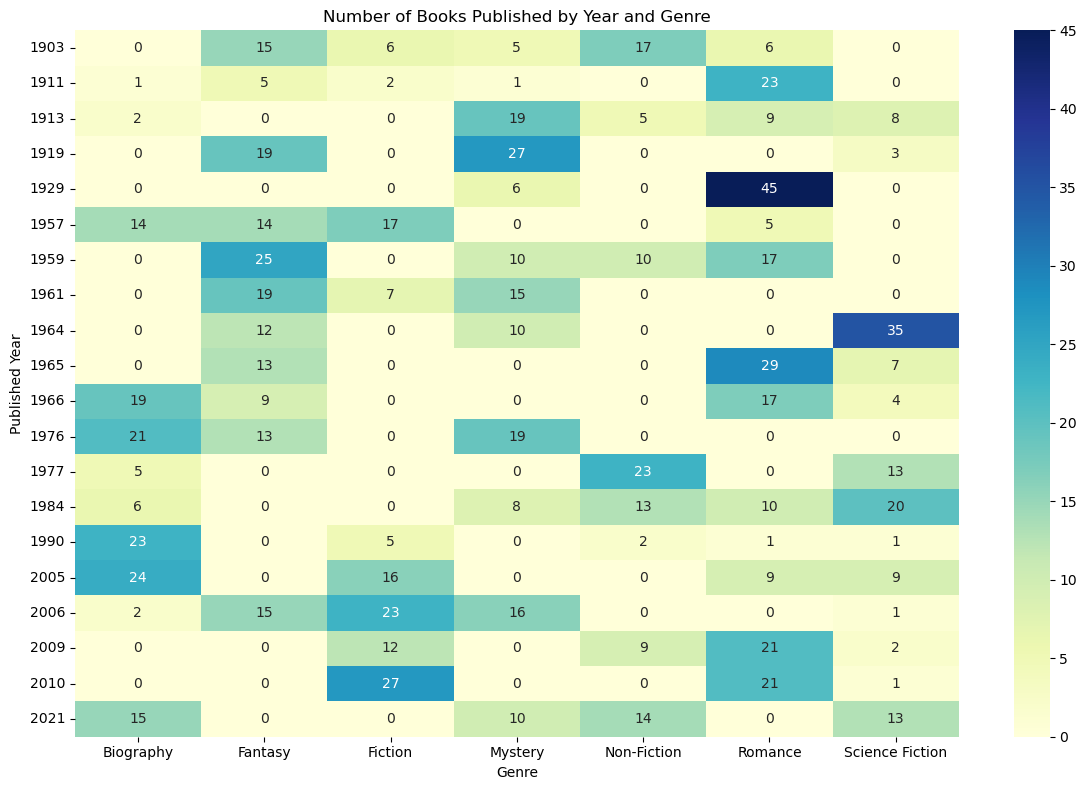

In [253]:
plt.figure(figsize=(12, 8))
sns.heatmap(pivot, cmap='YlGnBu', annot=True)
plt.title("Number of Books Published by Year and Genre")
plt.ylabel("Published Year")
plt.xlabel("Genre")
plt.tight_layout()
plt.show()

Romance were frequently published in 1929 and science fiction in 1964

### 8. Is there a correlation between Quantity and Total Amount?

In [260]:
filter_date[['Quantity','Total_Amount']].corr()

,Quantity,Total_Amount
Quantity,1.00000,0.74273
Total_Amount,0.74273,1.00000


There appears to be a correlation between the two variables

# Data Transformation

In [274]:
## turn the Price into groups/ ranges and load the new data to SQL
##since the price column is mostly unifrom , arrange the values into groups
final_df['Price'].min() #5.07
final_df['Price'].max() #49.98

49.98

In [275]:
bins =[5,20,35,50]

pd.cut(final_df['Price'], bins =bins, labels =['low_range(5-19)', 'medium_range(20-34)','high_range(35-49)']).value_counts().sort_index()

Price
low_range(5-19)        163
medium_range(20-34)    167
high_range(35-49)      163
Name: count, dtype: int64

In [277]:
final_df['price_range']= pd.cut(final_df['Price'], bins =bins, labels =['low_range(5-19)', 'medium_range(20-34)','high_range(35-49)'])

In [283]:
## make the same change to the original table
book['price_range'] = pd.cut(book['Price'], bins =bins, labels =['low_range(5-19)', 'medium_range(20-34)','high_range(35-49)'])

In [285]:
##load the cleaned and transformed books and cutomers table back to SQL database
book.to_sql('books', engine, if_exists='replace', index=False )

-1

In [287]:
cus.to_sql('customers', engine, if_exists='replace', index=False)

-1